In [32]:
import json
import pandas as pd
import os
from src.metrics import calculate_metrics, concat_and_process_results

In [43]:
import matplotlib.pyplot as plt


def plot_accuracy_vs_reject_rate(results, experiment_name):
    experiments = results["experiments"]
    reject_rates = [exp["reject_rate"] * 100 for exp in experiments]
    accuracies = [exp["accuracy"] for exp in experiments]

    fig = plt.figure(figsize=(8, 6))
    plt.plot(reject_rates, accuracies, marker="o", linestyle="-")
    plt.xlabel("Reject Rate (%)")
    plt.ylabel("Result Accuracy")
    plt.title("Accuracy vs. Reject Rate")
    plt.grid(True)
    plt.show()
    fig.savefig(f"{experiment_name}.png")
    plt.close(fig)

In [34]:
from IPython.display import display


def show_experiment_table(result):
    """
    Given a results dictionary with an "experiments" key,
    display a table showing confidence, reject rate, and accuracy.
    """
    # Create a DataFrame from the experiments list
    experiments = result["experiments"]
    df = pd.DataFrame(experiments)

    # If your reject_rate is stored as a fraction, convert it to percentage.
    # Otherwise, comment out the following line.
    df["reject_rate"] = df["reject_rate"] * 100

    # Optionally, sort the DataFrame by confidence
    df = df.sort_values("confidence")

    # Rename columns for clarity in the table
    df = df.rename(
        columns={
            "confidence": "Confidence",
            "reject_rate": "Reject Rate (%)",
            "accuracy": "Accuracy",
        }
    )

    # Display the table
    display(df)

In [35]:
base_folder = "/home/ran/afeka/computer-vision/results/2025-02-04-14-17/"
conclusion_dir = "/home/ran/Github-projects/afeka-computer-vision/results"
original_file = "baseline_no_rejection.csv"
df = pd.read_csv(os.path.join(base_folder, original_file), index_col=0)

In [36]:
# original model no rejection results
# 100 confidence means no rejection at all

original_metrics = calculate_metrics(
    df=df, label_col="true_label", pred_col="prediction"
)

original_model = {
    "accuracy": original_metrics["accuracy"],
    "confidence": 100,
    "reject_rate": 0,
}

In [37]:
# define settings for different experiments
settings = {
    "equal_weights": {"knn": 0.33, "margin": 0.33, "mahalanobis": 0.33},
    "higher_mahalanobis": {"knn": 0.2, "margin": 0.2, "mahalanobis": 0.6},
    "higher_margin": {"knn": 0.2, "margin": 0.6, "mahalanobis": 0.2},
    "higher_knn": {"knn": 0.6, "margin": 0.2, "mahalanobis": 0.2},
}

In [38]:
for setting in settings:
    experiment_file = f"{setting}.csv"
    weights = settings[setting]
    experiments = []
    for confidence in range(20, 90, 7):
        data = concat_and_process_results(
            base_folder, original_file, experiment_file, confidence / 100
        )
        equal_metrics = calculate_metrics(
            df=data[data["rejected"]], label_col="true_label", pred_col="prediction"
        )
        reject_rate = len(data[data["rejected"]]) / len(data)
        experiments.append(
            {
                "confidence": confidence,
                "accuracy": equal_metrics["accuracy"],
                "reject_rate": reject_rate,
            }
        )

    results = {
        "models": weights,
        "original_model": original_model,
        "experiments": experiments,
    }

    output_filename = os.path.join(conclusion_dir, f"{setting}.json")
    with open(output_filename, "w") as f:
        json.dump(results, f, indent=4)

    print(f"results saved to {output_filename}")

results saved to /home/ran/Github-projects/afeka-computer-vision/results/equal_weights.json
results saved to /home/ran/Github-projects/afeka-computer-vision/results/higher_mahalanobis.json
results saved to /home/ran/Github-projects/afeka-computer-vision/results/higher_margin.json
results saved to /home/ran/Github-projects/afeka-computer-vision/results/higher_knn.json


higher_mahalanobis


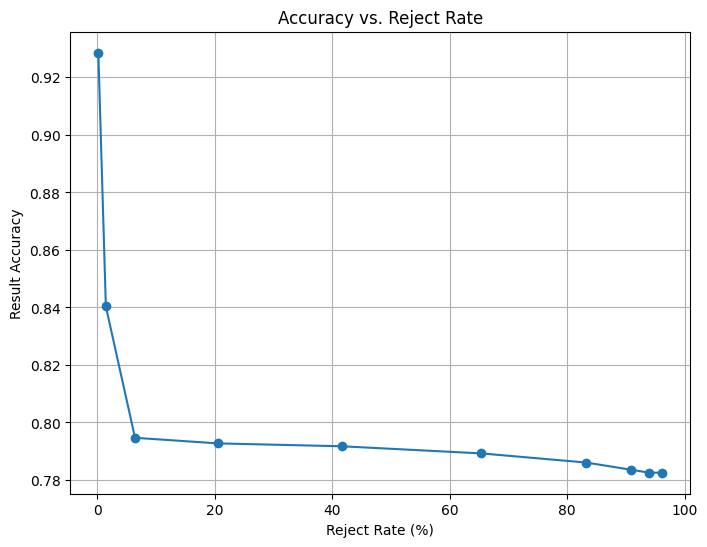

equal_weights


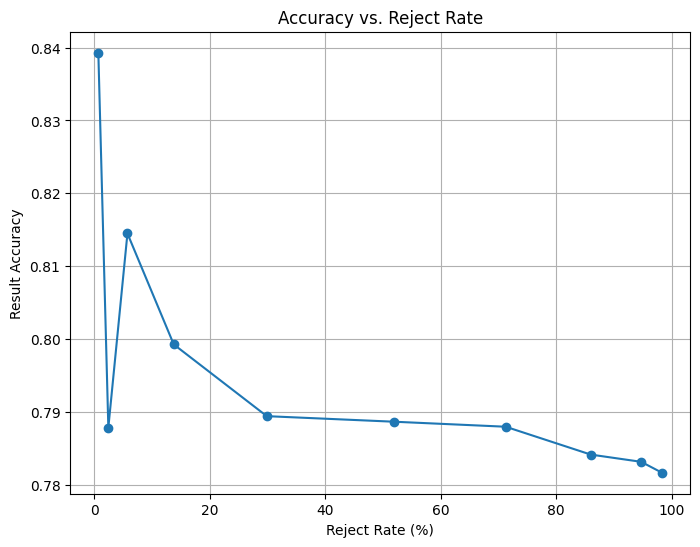

higher_margin


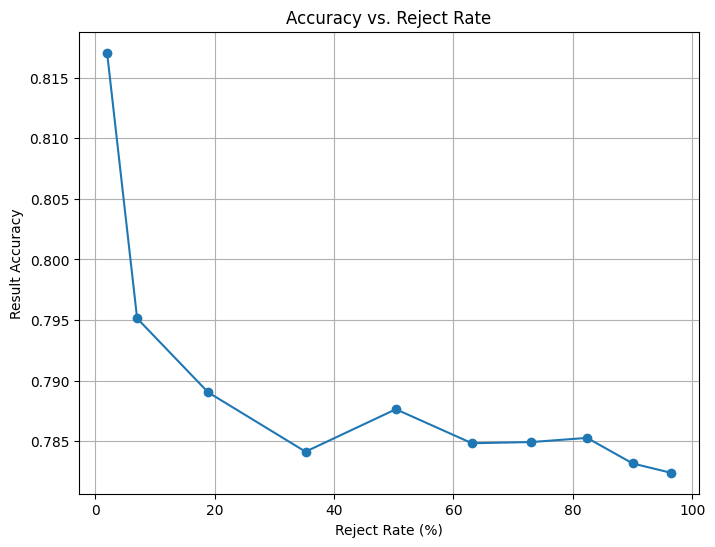

higher_knn


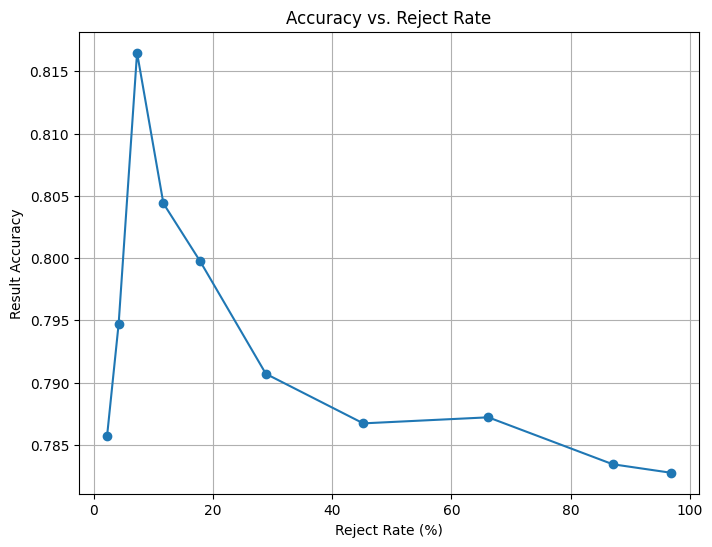

In [44]:
for filename in os.listdir(conclusion_dir):
    experiment_name = filename.split(".json")[0]
    print(experiment_name)
    fig_name = os.path.join(conclusion_dir, f"{experiment_name}")
    with open(os.path.join(conclusion_dir, filename), "r") as f:
        result = json.load(f)
    plot_accuracy_vs_reject_rate(result, fig_name)

In [46]:
for filename in os.listdir(conclusion_dir):
    if filename.endswith(".json"):
        experiment_name = filename.split(".json")[0]
        print(experiment_name)
        with open(os.path.join(conclusion_dir, filename), "r") as f:
            result = json.load(f)
        show_experiment_table(result)

higher_mahalanobis


,Confidence,Accuracy,Reject Rate (%)
0,20,0.782531,96.154785
1,27,0.782558,93.920898
2,34,0.783584,90.869141
3,41,0.786070,83.251953
4,48,0.789248,65.393066
5,55,0.791728,41.613770
6,62,0.792734,20.495605
7,69,0.794677,6.420898
8,76,0.840336,1.452637
9,83,0.928571,0.170898


equal_weights


,Confidence,Accuracy,Reject Rate (%)
0,20,0.781696,98.303223
1,27,0.783192,94.702148
2,34,0.784183,85.974121
3,41,0.788003,71.228027
4,48,0.788693,51.818848
5,55,0.789452,29.858398
6,62,0.799290,13.745117
7,69,0.814499,5.725098
8,76,0.787879,2.416992
9,83,0.839286,0.683594


higher_margin


,Confidence,Accuracy,Reject Rate (%)
0,20,0.782394,96.374512
1,27,0.783157,90.014648
2,34,0.785270,82.373047
3,41,0.784926,73.046875
4,48,0.784830,63.085938
5,55,0.787636,50.354004
6,62,0.784130,35.229492
7,69,0.789032,18.920898
8,76,0.795139,7.031250
9,83,0.817073,2.001953


higher_knn


,Confidence,Accuracy,Reject Rate (%)
0,20,0.782751,96.813965
1,27,0.783431,87.084961
2,34,0.787203,66.198730
3,41,0.786717,45.214844
4,48,0.790698,28.869629
5,55,0.799727,17.858887
6,62,0.804393,11.669922
7,69,0.816498,7.250977
8,76,0.794721,4.162598
9,83,0.785714,2.221680
